# Análisis exploratorio del dataset fuente


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
file_data1 = '/content/drive/MyDrive/ANALISIS DE CARRITO ABANDONADO/0- DATA CRUDA/ecommerce_customer_data_custom_ratios.csv'

In [4]:
file_data2 = '/content/drive/MyDrive/ANALISIS DE CARRITO ABANDONADO/0- DATA CRUDA/ecommerce_customer_data_large.csv'

In [5]:
test_df1 = pd.read_csv(file_data1,sep=',')
test_df2 = pd.read_csv(file_data1,sep=',')

In [6]:
df= pd.concat([test_df1,test_df2])

In [7]:
df.head(10)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1
5,13593,2023-03-07 14:17:42,Home,250,4,575,PayPal,49,1.0,James Grant,49,Female,1
6,13593,2023-04-15 03:02:33,Electronics,73,1,1896,Credit Card,49,0.0,James Grant,49,Female,1
7,13593,2021-03-27 21:23:28,Books,337,2,2937,Cash,49,0.0,James Grant,49,Female,1
8,13593,2020-05-05 20:14:00,Clothing,182,2,3363,PayPal,49,1.0,James Grant,49,Female,1
9,28805,2023-09-13 04:24:00,Electronics,394,2,1993,Credit Card,19,0.0,Jose Collier,19,Male,0


In [8]:
df.shape

(500000, 13)

In [9]:
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,404808.000000,500000.000000,500000.000000
mean,25004.036240,254.659512,2.998896,2725.370732,43.940528,0.497861,43.940528,0.199496
std,14428.265162,141.568435,1.414692,1442.932122,15.350231,0.499996,15.350231,0.399622
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.000000
25%,12497.750000,132.000000,2.000000,1477.000000,31.000000,0.000000,31.000000,0.000000
50%,25018.000000,255.000000,3.000000,2724.000000,44.000000,0.000000,44.000000,0.000000
75%,37506.000000,377.000000,4.000000,3974.000000,57.000000,1.000000,57.000000,0.000000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            500000 non-null  int64  
 1   Purchase Date          500000 non-null  object 
 2   Product Category       500000 non-null  object 
 3   Product Price          500000 non-null  int64  
 4   Quantity               500000 non-null  int64  
 5   Total Purchase Amount  500000 non-null  int64  
 6   Payment Method         500000 non-null  object 
 7   Customer Age           500000 non-null  int64  
 8   Returns                404808 non-null  float64
 9   Customer Name          500000 non-null  object 
 10  Age                    500000 non-null  int64  
 11  Gender                 500000 non-null  object 
 12  Churn                  500000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 53.4+ MB


La única columna que posee nulos es Returns


# Descartamos columnas que creemos no son útiles

In [11]:
df = df.drop(columns=['Customer Name'], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 0 to 249999
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            500000 non-null  int64  
 1   Purchase Date          500000 non-null  object 
 2   Product Category       500000 non-null  object 
 3   Product Price          500000 non-null  int64  
 4   Quantity               500000 non-null  int64  
 5   Total Purchase Amount  500000 non-null  int64  
 6   Payment Method         500000 non-null  object 
 7   Customer Age           500000 non-null  int64  
 8   Returns                404808 non-null  float64
 9   Age                    500000 non-null  int64  
 10  Gender                 500000 non-null  object 
 11  Churn                  500000 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 49.6+ MB


El argumento por el cual, sacamos la columna nombres, es por que sabemos que cada nombre esta ASOCIADO A UN Customer ID y decidimos conservar el Customer ID, pues con esa columna tenemos la informacon suficiente sobre la identificacion de los clientes.

Otra columna que parece redundante es la columna **Age**, ya que existe otra columna refiriéndose a la edad de los clientes, **Customer Age**.
Realicemos un análisis de la correlación entre ambas.

In [13]:
df['Customer Age'].corr(df['Age'])

0.9999999999999999

La correlación entre ambas es positiva, podemos descartar una columna y conservar la otra sin perder información de los datos pues por construcción ambas refieren a lo mismo.

Decidimos **descartar** **Age**

In [14]:
df = df.drop(columns=['Age'], axis=1)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            500000 non-null  int64  
 1   Purchase Date          500000 non-null  object 
 2   Product Category       500000 non-null  object 
 3   Product Price          500000 non-null  int64  
 4   Quantity               500000 non-null  int64  
 5   Total Purchase Amount  500000 non-null  int64  
 6   Payment Method         500000 non-null  object 
 7   Customer Age           500000 non-null  int64  
 8   Returns                404808 non-null  float64
 9   Gender                 500000 non-null  object 
 10  Churn                  500000 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 45.8+ MB


#  Análisis de la columna Returns

In [16]:
df['Returns'].unique()

array([ 0.,  1., nan])

Como vemos algunos valores de esta columna son nan, veamos cuantas filas cumplen esto

In [17]:
df_nan_returns = df[df['Returns'].isna()]
print('cantidad de filas totales: ',len(df))
print('cantidad de filas con Returns sin valor númerico: ',len(df_nan_returns))

cantidad de filas totales:  500000
cantidad de filas con Returns sin valor númerico:  95192


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
import warnings
warnings.filterwarnings("ignore")

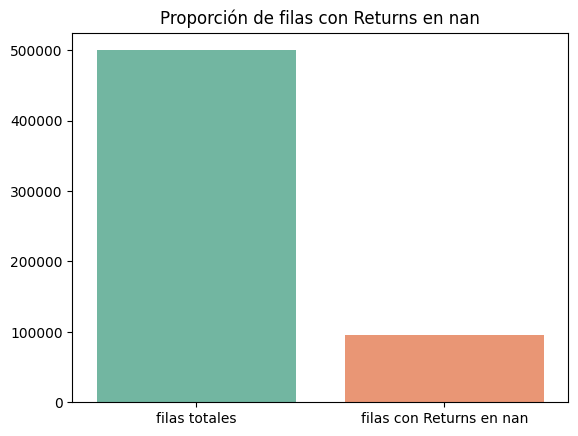

In [20]:
sns.barplot({'filas totales':len(df), 'filas con Returns en nan':len(df_nan_returns)}, palette='Set2').set(title='Proporción de filas con Returns en nan');

El total de filas que no registra valor de Returns es de alrededor del 20% del total.

Observemos la proporción de returns positivos vs negativos de las filas sin nans en esta columna.

In [21]:
df_returns = df[~df['Returns'].isna()]
df_yes_returns = df_returns[df_returns['Returns'] > 0]
df_no_returns = df_returns[df_returns['Returns'] == 0]

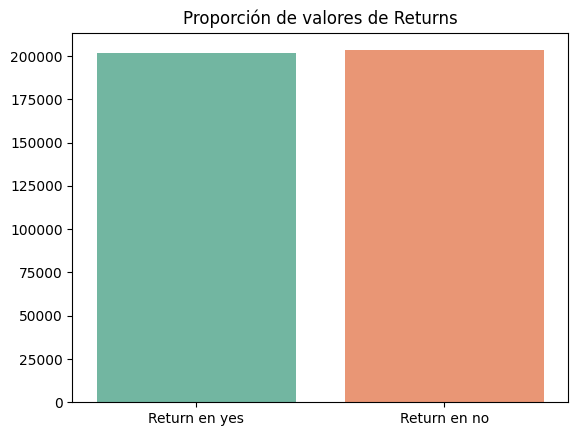

In [22]:
sns.barplot({'Return en yes':len(df_yes_returns), 'Return en no':len(df_no_returns)}, palette='Set2').set(title='Proporción de valores de Returns');


Vemos un patrón 50x50, ambas categorías poseen similares cantidades.

Observemos la proporción de los valores de Churn respecto a los de Returns

In [23]:
df_nan_returns_yes_churn = df_nan_returns[df_nan_returns['Churn'] > 0]
df_nan_returns_no_churn = df_nan_returns[df_nan_returns['Churn'] == 0]
df_returns_yes_churn = df_returns[df_returns['Churn'] > 0]
df_returns_no_churn = df_returns[df_returns['Churn'] == 0]

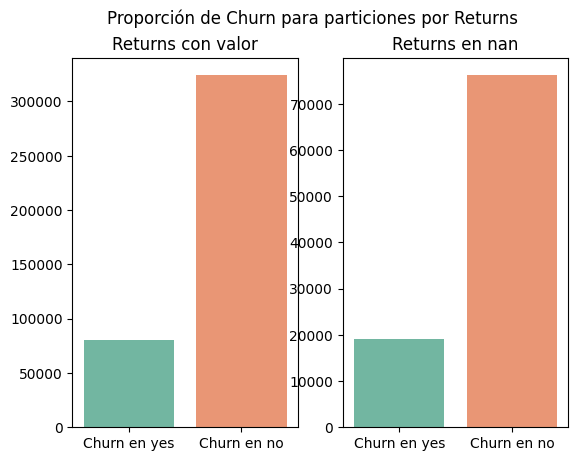

In [24]:
fig, axes = plt.subplots(1, 2)
sns.barplot({'Churn en yes':len(df_returns_yes_churn), 'Churn en no':len(df_returns_no_churn)}, palette='Set2', ax=axes[0]).set(title='Returns con valor');
sns.barplot({'Churn en yes':len(df_nan_returns_yes_churn), 'Churn en no':len(df_nan_returns_no_churn)}, palette='Set2', ax=axes[1]).set(title='Returns en nan');
fig.suptitle('Proporción de Churn para particiones por Returns');

En ambos casos la proporción de churn es alrdedor de un 20% en si y el 80% en no, un patrón 20x80.

Debemos conservar el 50x50 presentado por Returns yes/no y el 20x80 presentado por Churn yes/no

In [25]:
df_nan_returns_yes_churn = df_nan_returns[df_nan_returns['Churn'] > 0]
df_nan_returns_no_churn = df_nan_returns[df_nan_returns['Churn'] == 0]

# Rellenando el return



Lo que vamos a hacer es llenar el campo Returns la mitad con unos y la otra con ceros. Antes de partir a la mitad y proceder con esto mezclamos las filas para evitar generar un patrón no deseado.

In [26]:
random_sample = df_nan_returns_yes_churn.sample(frac=1, random_state=1)

In [27]:
# Reiniciar el índice
df_reset = random_sample.reset_index()
df_reset

,index,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn
0,221489,24299,2022-04-14 08:40:46,Books,92,1,3791,PayPal,67,NaN,Female,1
1,213166,3650,2020-11-11 15:53:38,Electronics,465,4,3716,Credit Card,62,NaN,Female,1
2,10652,15051,2021-07-14 07:51:19,Clothing,110,2,4960,PayPal,45,NaN,Female,1
3,225343,45430,2022-01-17 08:55:51,Home,174,2,2427,PayPal,61,NaN,Female,1
4,194990,42867,2021-06-09 01:04:05,Electronics,163,3,3643,Credit Card,21,NaN,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19015,36983,2730,2023-01-22 06:04:29,Home,452,1,957,Crypto,43,NaN,Male,1
19016,204941,24846,2021-07-03 21:24:09,Clothing,131,4,1015,Crypto,42,NaN,Male,1
19017,137537,2342,2021-01-16 23:15:46,Clothing,257,2,1786,Crypto,20,NaN,Male,1
19018,70514,36818,2022-03-01 07:55:15,Home,267,2,2935,Credit Card,46,NaN,Female,1


# Rellenando el campo return con los valores para churn uno

La primer mitad de las filas con Churn en 1 van hasta el 9510, pues en total son 19020. A esas las rellenamos con 1 en el campo Returns

In [28]:
return_nan_churnuno_uno = df_reset[0:9510]
return_nan_churnuno_uno['Returns'] = 1
return_nan_churnuno_uno

,index,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn
0,221489,24299,2022-04-14 08:40:46,Books,92,1,3791,PayPal,67,1,Female,1
1,213166,3650,2020-11-11 15:53:38,Electronics,465,4,3716,Credit Card,62,1,Female,1
2,10652,15051,2021-07-14 07:51:19,Clothing,110,2,4960,PayPal,45,1,Female,1
3,225343,45430,2022-01-17 08:55:51,Home,174,2,2427,PayPal,61,1,Female,1
4,194990,42867,2021-06-09 01:04:05,Electronics,163,3,3643,Credit Card,21,1,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9505,204070,16411,2021-07-23 08:28:21,Electronics,418,4,4123,Cash,45,1,Female,1
9506,219656,31917,2021-07-18 00:23:52,Clothing,292,2,4321,Cash,61,1,Female,1
9507,192663,33397,2021-05-26 05:58:41,Home,172,2,4634,PayPal,28,1,Female,1
9508,96132,17394,2020-10-12 18:56:45,Electronics,326,2,3796,Cash,58,1,Female,1


La otra mitad empieza en la fila 9511, las rellenamos con 0

In [29]:
return_nan_churnuno_dos = df_reset[9511:]
return_nan_churnuno_dos['Returns'] = 0
return_nan_churnuno_dos

,index,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn
9511,15592,48327,2023-05-31 21:14:01,Books,83,4,645,Credit Card,29,0,Male,1
9512,10432,47905,2021-08-07 17:54:31,Home,267,2,1827,PayPal,38,0,Female,1
9513,16938,48909,2022-07-30 13:52:23,Home,268,5,530,PayPal,38,0,Female,1
9514,175795,31181,2022-06-28 14:58:48,Books,191,3,3096,PayPal,53,0,Male,1
9515,126669,34591,2020-04-25 03:54:27,Electronics,309,2,3280,Cash,41,0,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19015,36983,2730,2023-01-22 06:04:29,Home,452,1,957,Crypto,43,0,Male,1
19016,204941,24846,2021-07-03 21:24:09,Clothing,131,4,1015,Crypto,42,0,Male,1
19017,137537,2342,2021-01-16 23:15:46,Clothing,257,2,1786,Crypto,20,0,Male,1
19018,70514,36818,2022-03-01 07:55:15,Home,267,2,2935,Credit Card,46,0,Female,1


In [30]:
return_reemplazado_churnuno = pd.concat([return_nan_churnuno_uno,return_nan_churnuno_dos])
return_reemplazado_churnuno

,index,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn
0,221489,24299,2022-04-14 08:40:46,Books,92,1,3791,PayPal,67,1,Female,1
1,213166,3650,2020-11-11 15:53:38,Electronics,465,4,3716,Credit Card,62,1,Female,1
2,10652,15051,2021-07-14 07:51:19,Clothing,110,2,4960,PayPal,45,1,Female,1
3,225343,45430,2022-01-17 08:55:51,Home,174,2,2427,PayPal,61,1,Female,1
4,194990,42867,2021-06-09 01:04:05,Electronics,163,3,3643,Credit Card,21,1,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19015,36983,2730,2023-01-22 06:04:29,Home,452,1,957,Crypto,43,0,Male,1
19016,204941,24846,2021-07-03 21:24:09,Clothing,131,4,1015,Crypto,42,0,Male,1
19017,137537,2342,2021-01-16 23:15:46,Clothing,257,2,1786,Crypto,20,0,Male,1
19018,70514,36818,2022-03-01 07:55:15,Home,267,2,2935,Credit Card,46,0,Female,1


# Rellenando el campo return con los valores para churn cero

Misma lógica de rellenado que aplicamos en las filas con churn 1

In [31]:
random_sample_no = df_nan_returns_no_churn.sample(frac=1, random_state=1)
random_sample_no

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn
193632,33614,2020-09-26 04:15:06,Electronics,360,4,672,Credit Card,30,NaN,Male,0
92464,17186,2021-07-07 19:02:43,Electronics,282,3,3084,Cash,35,NaN,Male,0
209463,1352,2020-09-13 11:31:26,Books,475,1,2600,Crypto,27,NaN,Male,0
170847,49605,2021-02-02 10:42:03,Books,323,3,2916,Cash,50,NaN,Female,0
123457,43815,2022-06-14 09:36:26,Books,238,2,3320,Cash,52,NaN,Male,0
...,...,...,...,...,...,...,...,...,...,...,...
134197,47353,2020-09-12 02:39:04,Clothing,127,2,1100,Cash,58,NaN,Male,0
139845,46420,2022-10-02 20:46:10,Books,108,2,3612,Cash,33,NaN,Female,0
231105,45937,2022-10-13 08:17:48,Electronics,297,3,4914,Credit Card,56,NaN,Female,0
78237,29961,2020-03-31 13:20:33,Home,235,4,2400,Cash,55,NaN,Male,0


In [32]:
df_reset_no = random_sample_no.reset_index()
df_reset_no

,index,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn
0,193632,33614,2020-09-26 04:15:06,Electronics,360,4,672,Credit Card,30,NaN,Male,0
1,92464,17186,2021-07-07 19:02:43,Electronics,282,3,3084,Cash,35,NaN,Male,0
2,209463,1352,2020-09-13 11:31:26,Books,475,1,2600,Crypto,27,NaN,Male,0
3,170847,49605,2021-02-02 10:42:03,Books,323,3,2916,Cash,50,NaN,Female,0
4,123457,43815,2022-06-14 09:36:26,Books,238,2,3320,Cash,52,NaN,Male,0
...,...,...,...,...,...,...,...,...,...,...,...,...
76167,134197,47353,2020-09-12 02:39:04,Clothing,127,2,1100,Cash,58,NaN,Male,0
76168,139845,46420,2022-10-02 20:46:10,Books,108,2,3612,Cash,33,NaN,Female,0
76169,231105,45937,2022-10-13 08:17:48,Electronics,297,3,4914,Credit Card,56,NaN,Female,0
76170,78237,29961,2020-03-31 13:20:33,Home,235,4,2400,Cash,55,NaN,Male,0


76000 filas en total, hasta la 38086, la mitad, se rellena Returns con 1 y desde allí se rellenan con 0

In [33]:
return_nan_churncero_uno = df_reset_no[0:38086]
return_nan_churncero_uno['Returns'] = 1
return_nan_churncero_uno

,index,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn
0,193632,33614,2020-09-26 04:15:06,Electronics,360,4,672,Credit Card,30,1,Male,0
1,92464,17186,2021-07-07 19:02:43,Electronics,282,3,3084,Cash,35,1,Male,0
2,209463,1352,2020-09-13 11:31:26,Books,475,1,2600,Crypto,27,1,Male,0
3,170847,49605,2021-02-02 10:42:03,Books,323,3,2916,Cash,50,1,Female,0
4,123457,43815,2022-06-14 09:36:26,Books,238,2,3320,Cash,52,1,Male,0
...,...,...,...,...,...,...,...,...,...,...,...,...
38081,213512,11699,2021-09-28 18:59:43,Clothing,128,3,1258,Cash,29,1,Female,0
38082,209959,46051,2021-11-14 15:59:51,Clothing,385,1,2849,PayPal,26,1,Male,0
38083,118597,19717,2020-11-14 06:26:37,Books,352,3,813,Crypto,56,1,Female,0
38084,460,10687,2022-10-12 11:28:57,Home,454,5,5201,Cash,59,1,Female,0


In [34]:
return_nan_churncero_cero = df_reset_no[38087:]
return_nan_churncero_cero['Returns'] = 0
return_nan_churncero_cero

,index,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn
38087,232477,42953,2023-02-06 03:07:04,Clothing,157,5,4244,PayPal,47,0,Male,0
38088,78794,27313,2022-12-25 17:28:46,Home,363,5,2571,Cash,51,0,Male,0
38089,77965,39327,2021-07-13 16:11:24,Electronics,62,5,702,Cash,46,0,Female,0
38090,231440,36968,2022-12-12 22:22:25,Electronics,104,5,2288,PayPal,47,0,Male,0
38091,246460,24112,2021-10-21 17:54:46,Clothing,424,2,282,PayPal,44,0,Male,0
...,...,...,...,...,...,...,...,...,...,...,...,...
76167,134197,47353,2020-09-12 02:39:04,Clothing,127,2,1100,Cash,58,0,Male,0
76168,139845,46420,2022-10-02 20:46:10,Books,108,2,3612,Cash,33,0,Female,0
76169,231105,45937,2022-10-13 08:17:48,Electronics,297,3,4914,Credit Card,56,0,Female,0
76170,78237,29961,2020-03-31 13:20:33,Home,235,4,2400,Cash,55,0,Male,0


In [35]:
return_reemplazado_churncero = pd.concat([return_nan_churncero_cero,return_nan_churncero_uno])
return_reemplazado_churncero

,index,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn
38087,232477,42953,2023-02-06 03:07:04,Clothing,157,5,4244,PayPal,47,0,Male,0
38088,78794,27313,2022-12-25 17:28:46,Home,363,5,2571,Cash,51,0,Male,0
38089,77965,39327,2021-07-13 16:11:24,Electronics,62,5,702,Cash,46,0,Female,0
38090,231440,36968,2022-12-12 22:22:25,Electronics,104,5,2288,PayPal,47,0,Male,0
38091,246460,24112,2021-10-21 17:54:46,Clothing,424,2,282,PayPal,44,0,Male,0
...,...,...,...,...,...,...,...,...,...,...,...,...
38081,213512,11699,2021-09-28 18:59:43,Clothing,128,3,1258,Cash,29,1,Female,0
38082,209959,46051,2021-11-14 15:59:51,Clothing,385,1,2849,PayPal,26,1,Male,0
38083,118597,19717,2020-11-14 06:26:37,Books,352,3,813,Crypto,56,1,Female,0
38084,460,10687,2022-10-12 11:28:57,Home,454,5,5201,Cash,59,1,Female,0


In [36]:
return_reemplazados = pd.concat([return_reemplazado_churncero,return_reemplazado_churnuno])
return_reemplazados

,index,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn
38087,232477,42953,2023-02-06 03:07:04,Clothing,157,5,4244,PayPal,47,0,Male,0
38088,78794,27313,2022-12-25 17:28:46,Home,363,5,2571,Cash,51,0,Male,0
38089,77965,39327,2021-07-13 16:11:24,Electronics,62,5,702,Cash,46,0,Female,0
38090,231440,36968,2022-12-12 22:22:25,Electronics,104,5,2288,PayPal,47,0,Male,0
38091,246460,24112,2021-10-21 17:54:46,Clothing,424,2,282,PayPal,44,0,Male,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19015,36983,2730,2023-01-22 06:04:29,Home,452,1,957,Crypto,43,0,Male,1
19016,204941,24846,2021-07-03 21:24:09,Clothing,131,4,1015,Crypto,42,0,Male,1
19017,137537,2342,2021-01-16 23:15:46,Clothing,257,2,1786,Crypto,20,0,Male,1
19018,70514,36818,2022-03-01 07:55:15,Home,267,2,2935,Credit Card,46,0,Female,1


In [37]:
return_reemplazados.drop(['index'], axis=1, inplace= True)


In [38]:
return_reemplazados['Returns'].unique()

array([0, 1])

In [39]:
df_reemp_yes_returns = return_reemplazados[return_reemplazados['Returns'] > 0]
df_reemp_no_returns = return_reemplazados[return_reemplazados['Returns'] == 0]

Finalmente unimos las filas rellenadas con las filas que contaban con valores en Returns para generar el dataframe completo

In [40]:
return_completos = pd.concat([df_returns,return_reemplazados])
return_completos['Returns'].unique()

array([0., 1.])

In [41]:
return_completos

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,Female,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,2730,2023-01-22 06:04:29,Home,452,1,957,Crypto,43,0.0,Male,1
19016,24846,2021-07-03 21:24:09,Clothing,131,4,1015,Crypto,42,0.0,Male,1
19017,2342,2021-01-16 23:15:46,Clothing,257,2,1786,Crypto,20,0.0,Male,1
19018,36818,2022-03-01 07:55:15,Home,267,2,2935,Credit Card,46,0.0,Female,1


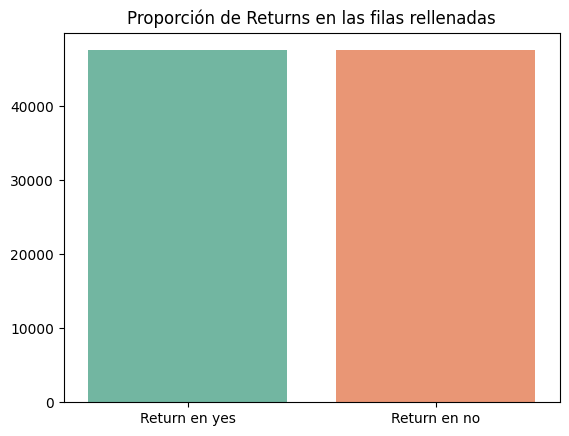

In [42]:
sns.barplot({'Return en yes':len(df_reemp_yes_returns), 'Return en no':len(df_reemp_no_returns)}, palette='Set2').set(title='Proporción de Returns en las filas rellenadas');


Como vemos la proporción de yes y no se mantiene 50x50 en el grupo rellenado, como queríamos.

Continuamos uniendo el grupo rellenado con el grupo que presenta valores en Returns.

In [43]:
df_completo = pd.concat([df_returns, return_reemplazados])

In [44]:
len(df_completo)

499998

In [45]:
df_yes_returns = df_completo[df_completo['Returns'] > 0]
df_no_returns = df_completo[df_completo['Returns'] == 0]

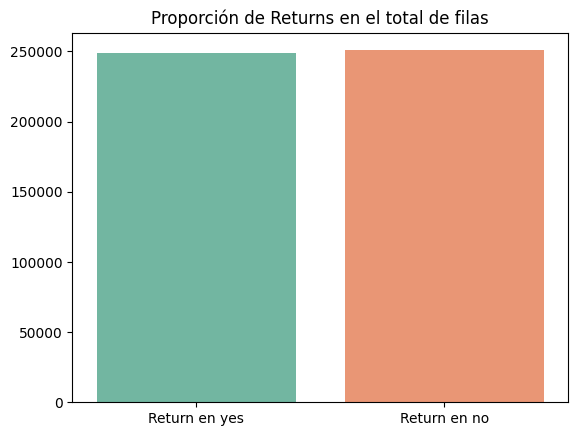

In [46]:
sns.barplot({'Return en yes':len(df_yes_returns), 'Return en no':len(df_no_returns)}, palette='Set2').set(title='Proporción de Returns en el total de filas');


Mantenemos la proporción en el dataset completado.

Veamos si persiste algún nan en Returns.

In [47]:
df_completo['Returns'].unique()

array([0., 1.])

# ANALISIS DE LA COLUMNA CATEGORIA

In [48]:
df_completo['Product Category'].unique()

array(['Electronics', 'Home', 'Clothing', 'Books'], dtype=object)

no encontramos nada raro , solo hay cuatro nombres.

# ANALISIS DE PAYMET METHOD

In [49]:
df_completo['Payment Method'].unique()

array(['Credit Card', 'PayPal', 'Cash', 'Crypto'], dtype=object)

igual que anteeriormente no encotramos nada raro asi que dejamos tal cual esta.

# GENDER

In [50]:
df_completo['Gender'].unique()

array(['Male', 'Female'], dtype=object)

no se encontro nada raro, se deja tal cual

# ANALISIS DE  Purchase Date

In [51]:
df_date= pd.to_datetime(df_completo['Purchase Date'])

In [52]:
import datetime as dt
year=df_date.dt.year


In [53]:
year

0        2020
1        2022
2        2022
3        2020
4        2020
         ... 
19015    2023
19016    2021
19017    2021
19018    2022
19019    2020
Name: Purchase Date, Length: 499998, dtype: int32

In [54]:
year.describe()

count    499998.000000
mean       2021.377990
std           1.077484
min        2020.000000
25%        2020.000000
50%        2021.000000
75%        2022.000000
max        2023.000000
Name: Purchase Date, dtype: float64

Hicimos un analisis del año, estan en el rango esperado.

In [55]:
month=df_date.dt.month

In [56]:
month.describe()

count    499998.000000
mean          6.186399
std           3.353737
min           1.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: Purchase Date, dtype: float64

No se observa valores anormales por lo que no se realiza ninguna modificación

In [57]:
day=df_date.dt.day

In [58]:
day.describe()

count    499998.000000
mean         15.634077
std           8.793352
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: Purchase Date, dtype: float64

No se observa valores anormales para los días por lo que no se realiza ninguna modificación


# Guardamos el resultado del análisis


In [59]:
ruta_archivo = '/content/drive/MyDrive/ANALISIS DE CARRITO ABANDONADO/1- EDA/Resultado/df_unido_procesado.parquet'

df_completo.to_parquet(ruta_archivo, index=False)

Generamos un csv para que sea usado en el dashboard

In [60]:
ruta_csv = '/content/drive/MyDrive/ANALISIS DE CARRITO ABANDONADO/3- DATA PROCESADA/dataset_para_dashboard.csv'
df_completo.to_csv(ruta_csv, index=False)